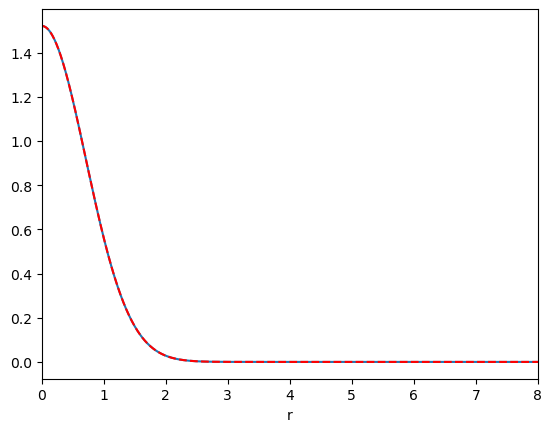

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

N = 600                                                   # Truncation ordem

L0 = 2                                               # Map parameter 

col = np.cos(np.arange(2*N + 4)*math.pi /(2*N + 3))      # collocation points (Verificado)

colr = col[1:N+2]

r = L0 * colr/(np.sqrt(1-colr**2))                       # physical domain (Verificado)             

#out_r = open('r_30_L02.txt', 'a')
#out_r.write(' ' +' '.join(str('%.18f'%n) for n in r)+'\n')
#out_r.close()


# Base Matrix (Tchebyshev Polinomials): 

SB = np.zeros([N+3,N+1])
rSB = np.zeros([N+3,N+1])
rrSB = np.zeros([N+3,N+1])


for i in range(N+1+1+1):
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))                                                  

for i in range(N+1+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2)) 

for i in range(N+1+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)                     


psi = SB[0:N+1,:]        # Base function
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]

# Initial conditions of Phi (Scalar field)                                    

r0 = 2

A0 = 1.520759743700873    # 1.520759743700872 -> disperse ; 1.520759743700873 -> colapse       

sigma = 1

Phi_0 = A0*np.exp((-r**2)/(sigma**2))           # Phi initial data (Verificado)

inv_psi = np.linalg.inv(psi)
  
a0 = np.dot(Phi_0, inv_psi)  # coeficients a(0)  (Verificado)

#out_a = open('a0_30_L02.txt', 'a')
#out_a.write(' ' +' '.join(str('%.18f'%n) for n in a0)+'\n')
#out_a.close()


Phi = np.dot(a0, psi)        # approximative solution in t = 0
rPhi= np.dot(a0, rpsi)

########################### Plot: Initial Conditions of Phi

M = 3000       # plot truncation

rplot = np.linspace(0.000001,15,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
rSBplot = np.zeros([N+1,M])
rrSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

for i in range(N+1):
  rSBplot[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2)) 

for i in range(N+1):
  rrSBplot[i,] = -np.sin((2*i+1)*np.arctan(L0/rplot))*(2*i+1)**2*L0**2/(rplot**4*(1+L0**2/rplot**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**3*(1+L0**2/rplot**2))-2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0**3/(rplot**5*(1+L0**2/rplot**2)**2)                     

psiplot = SBplot[0:(N+1),:] 
rpsiplot = rSBplot[0:(N+1),:]
rrpsiplot = rrSBplot[0:(N+1),:]

Phi_plot0 = A0*np.exp((-rplot**2)/(sigma**2))       


Phiplot = np.dot(a0, psiplot)


erro = Phi_plot0 - Phiplot

plt.plot(rplot, Phi_plot0, rplot, Phiplot, "--r")   #(Verificado)
plt.xlabel('r')
plt.xlim(0,8)
plt.show()



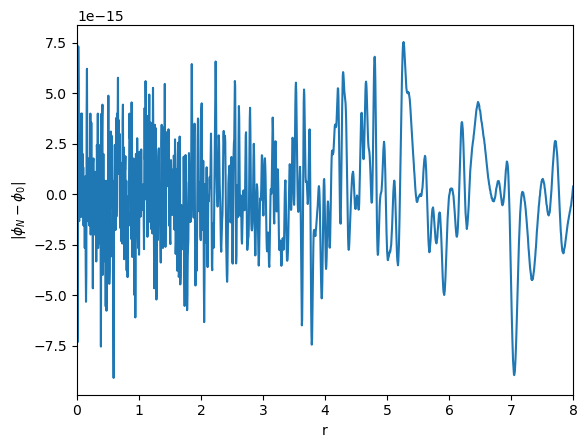

In [2]:
plt.plot(rplot, erro)
plt.xlabel('r')
plt.xlim(0,8)
plt.ylabel("$|\phi_N - \phi_0|$")
plt.show()

In [3]:
Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, psi)
Pi = np.dot(b0, psi)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i]  =   0.001
  
Chi=np.dot(c0,psi)    
rChi=np.dot(c0,rpsi)
rrChi=np.dot(c0,rrpsi)     

H0 = 4*rChi**2 + 4*rrChi + 8/r*rChi + 1/2*(rPhi)**2

JH = 8*np.dot(c0,rpsi)*rpsi + 4*rrpsi + 8/r*rpsi     # Jacobian Matrix

inv_JH = np.linalg.inv(JH)

N_int = 50

tol = 1e-40    # tolerance

# Newton Raphson loop
for i in range(N_int):
  Chi=np.dot(c0,psi)
  rChi=np.dot(c0,rpsi)
  rrChi=np.dot(c0,rrpsi)
  H0 = 4*rChi**2 + 4*rrChi + 8/r*rChi + 1/2*(rPhi)**2
  JH = 8*np.dot(c0,rpsi)*rpsi + 4*rrpsi + 8/r*rpsi
  cnew = c0 - np.dot(H0, inv_JH)
  if min(abs(cnew-c0)) < tol:
    break
  print(min(abs(cnew-c0)), end=' ')
  c0 = cnew

#out_c = open('c0_30_L02.txt', 'a')
#out_c.write(' ' +' '.join(str('%.18f'%n) for n in c0)+'\n')
#out_c.close()


0.001000191431772949 2.5852286117608006e-07 8.19179418200116e-09 5.830992230868694e-09 2.12133659130766e-09 6.008764089438545e-10 1.5867787565711174e-10 4.122643426076453e-11 1.0674746887830783e-11 2.7621947993765452e-12 7.146585854255131e-13 1.848985638775616e-13 4.7837315733571745e-14 1.2376555004076388e-14 3.202083833314404e-15 8.284487534127177e-16 2.143376873502571e-16 5.5453792040727795e-17 1.4347137751372154e-17 3.711871522298685e-18 9.603465231482718e-19 2.4849950980126946e-19 6.427220363823533e-20 1.6642338761328815e-20 4.291915777912667e-21 1.11759909847787e-21 2.9752439665322305e-22 2.405450839096361e-23 4.3890396920084226e-23 

Field equations

In [4]:
# Equation for Krr: momentum constraint

# Initial values of Krr: Base functions of Krr

SB1 = 1/2*(SB[1:(N+2),:] + SB[0:(N+1),:])          # VERIFICADO
rSB1 = 1/2*(rSB[1:(N+2),:] + rSB[0:(N+1),:])
rrSB1 = 1/2*(rrSB[1:(N+2),:] + rrSB[0:(N+1),:])


# Base functions for Beta

SB2 = np.zeros([N+1,N+1])      
rSB2 = np.zeros([N+1,N+1])
rrSB2 = np.zeros([N+1,N+1])

for i in range(N+1):                                                   # VERIFICADO
  SB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r))                                                  

for i in range(N+1):
  rSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**2*(1+L0**2/r**2))

for i in range(N+1):
  rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)

    

Quadrature Integration

In [5]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1) 

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)   

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # Legendre weight (Verificado)

rq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain

qSB = np.zeros([Nq+3,Nq+1])                # Base function in quadrature points
qrSB = np.zeros([Nq+3,Nq+1])
qrrSB = np.zeros([Nq+3,Nq+1])




for i in range(Nq+1+1+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))                                                  

for i in range(Nq+1+1+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*(1+L0**2/rq**2))

for i in range(Nq+1+1+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)                                         


qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]


# Initial Phi in quadrature points

#qPhi = np.dot(a0, qpsi)      
#rqPhi= np.dot(a0, rqpsi)

# Initial Pi for quadrature points

#qPi = np.dot(b0, qpsi) 


# Initial Chi for quadrature points:

#qChi = np.dot(c0, qpsi)   # Verificado todos
#rqChi = np.dot(c0, rqpsi)
#rrqChi = np.dot(c0, rrqpsi)

# Initial values of Krr:


qSB1 = 1/2*(qSB[1:(N+2),:] + qSB[0:(N+1),:])          # VERIFICADO
qrSB1 = 1/2*(qrSB[1:(N+2),:] + qrSB[0:(N+1),:])
qrrSB1 = 1/2*(qrrSB[1:(N+2),:] + qrrSB[0:(N+1),:])


#qKrr = np.dot(ck0, qSB1) 

# Alpha na origem

psi_0 = np.zeros(N+1)

for i in range(N+1):
  psi_0[i,] = np.sin((2*i+1)*math.pi/2)     # arccot(0) = Pi/2  

#Alpha_0 = 1 + np.dot(al0, psi_0) 

In [6]:
# Runge Kutta 4th order

h = 0.001   # step size
tf = 15

It = int(tf/h)

#t1 = np.linspace(0, tf, It) 

t = 0


Alpha_origin = []
phi_origin = []
L2HC = []
phi_set = []


V = 0
 
while t <= tf:
 
  # First step
  Phi = np.dot(a0, psi)      
  rPhi = np.dot(a0, rpsi)
  rrPhi = np.dot(a0, rrpsi)      
  Pi = np.dot(b0, psi) 
  rPi= np.dot(b0, rpsi)
  Chi = np.dot(c0, psi) 
  rChi = np.dot(c0, rpsi)
  rrChi = np.dot(c0, rrpsi)   
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)
  
  # L2-error associated to the Hamiltonian constraint
  qPhi = np.dot(a0, qpsi)      
  rqPhi= np.dot(a0, rqpsi)
  qPi = np.dot(b0, qpsi) 
  qChi = np.dot(c0, qpsi)
  rqChi = np.dot(c0, rqpsi)
  rrqChi = np.dot(c0, rrqpsi) 
  qKrr = np.dot(ck0, qSB1)
  H = 4*rqChi**2 + 4*rrqChi + 8*rqChi/rq + 3/4*np.exp(-4*qChi)*qKrr**2 + np.exp(4*qChi)*(1/2*qPi**2 + np.exp(-4*qChi)/2*rqPhi**2)   # Hamiltonian constraint (HC)
  L2HC.append((1/2*np.dot(H**2,wq_col))**1/2)    # L2 error of HC 
  
  # Alpha origin
  Alpha_origin.append(1 + np.dot(al0, psi_0))
#  print(Alpha_origin)
  
  # Phi origin:  
  phi_origin.append(np.dot(a0, psi_0))
#  print(phi_origin)
    
  # Second step
  Phi = np.dot(a0 + L1/2, psi)     
  rPhi= np.dot(a0 + L1/2 , rpsi)
  rrPhi = np.dot(a0 + L1/2, rrpsi) 
  Pi = np.dot(b0 + N1/2, psi)
  rPi= np.dot(b0 + N1/2, rpsi)
  Chi = np.dot(c0 + K1/2, psi)
  rChi = np.dot(c0 + K1/2, rpsi)
  rrChi = np.dot(c0 + K1/2, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)

  # Third step
  Phi = np.dot(a0 + L2/2, psi)     
  rPhi = np.dot(a0 + L2/2 , rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi) 
  Pi = np.dot(b0 + N2/2, psi)
  rPi= np.dot(b0 + N2/2, rpsi)
  Chi = np.dot(c0 + K2/2, psi)
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K2/2, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db) 

  # Forth step
  Phi = np.dot(a0 + L3, psi)     
  rPhi= np.dot(a0 + L3 , rpsi)
  rrPhi = np.dot(a0 + L3, rrpsi) 
  Pi = np.dot(b0 + N3, psi)
  rPi= np.dot(b0 + N3, rpsi)
  Chi = np.dot(c0 + K3, psi)
  rChi = np.dot(c0 + K3, rpsi)
  rrChi = np.dot(c0 + K3, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)  
  
  t = t + h
  print(t)
    
#  if t > 9:
#    h=0.0001

    
  # Evolution functions
  a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
  b0 = b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4)
  c0 = c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)  
  phi_set.append(np.dot(a0, psiplot))

#  pi_set[i,:] = np.dot(b0, psiplot)
#  chi_set[i,:] = np.dot(c0, psiplot)
  
  
t1 = np.linspace(0, tf, len(Alpha_origin)) 




0.001
0.002
0.003
0.004
0.005
0.006
0.007
0.008
0.009000000000000001
0.010000000000000002
0.011000000000000003
0.012000000000000004
0.013000000000000005
0.014000000000000005
0.015000000000000006
0.016000000000000007
0.017000000000000008
0.01800000000000001
0.01900000000000001
0.02000000000000001
0.02100000000000001
0.022000000000000013
0.023000000000000013
0.024000000000000014
0.025000000000000015
0.026000000000000016
0.027000000000000017
0.028000000000000018
0.02900000000000002
0.03000000000000002
0.03100000000000002
0.03200000000000002
0.03300000000000002
0.03400000000000002
0.035000000000000024
0.036000000000000025
0.037000000000000026
0.03800000000000003
0.03900000000000003
0.04000000000000003
0.04100000000000003
0.04200000000000003
0.04300000000000003
0.04400000000000003
0.04500000000000003
0.046000000000000034
0.047000000000000035
0.048000000000000036
0.04900000000000004
0.05000000000000004
0.05100000000000004
0.05200000000000004
0.05300000000000004
0.05400000000000004
0.05500000

0.4230000000000003
0.4240000000000003
0.4250000000000003
0.4260000000000003
0.4270000000000003
0.4280000000000003
0.4290000000000003
0.4300000000000003
0.4310000000000003
0.43200000000000033
0.43300000000000033
0.43400000000000033
0.43500000000000033
0.43600000000000033
0.43700000000000033
0.43800000000000033
0.43900000000000033
0.44000000000000034
0.44100000000000034
0.44200000000000034
0.44300000000000034
0.44400000000000034
0.44500000000000034
0.44600000000000034
0.44700000000000034
0.44800000000000034
0.44900000000000034
0.45000000000000034
0.45100000000000035
0.45200000000000035
0.45300000000000035
0.45400000000000035
0.45500000000000035
0.45600000000000035
0.45700000000000035
0.45800000000000035
0.45900000000000035
0.46000000000000035
0.46100000000000035
0.46200000000000035
0.46300000000000036
0.46400000000000036
0.46500000000000036
0.46600000000000036
0.46700000000000036
0.46800000000000036
0.46900000000000036
0.47000000000000036
0.47100000000000036
0.47200000000000036
0.4730000

0.8520000000000006
0.8530000000000006
0.8540000000000006
0.8550000000000006
0.8560000000000006
0.8570000000000007
0.8580000000000007
0.8590000000000007
0.8600000000000007
0.8610000000000007
0.8620000000000007
0.8630000000000007
0.8640000000000007
0.8650000000000007
0.8660000000000007
0.8670000000000007
0.8680000000000007
0.8690000000000007
0.8700000000000007
0.8710000000000007
0.8720000000000007
0.8730000000000007
0.8740000000000007
0.8750000000000007
0.8760000000000007
0.8770000000000007
0.8780000000000007
0.8790000000000007
0.8800000000000007
0.8810000000000007
0.8820000000000007
0.8830000000000007
0.8840000000000007
0.8850000000000007
0.8860000000000007
0.8870000000000007
0.8880000000000007
0.8890000000000007
0.8900000000000007
0.8910000000000007
0.8920000000000007
0.8930000000000007
0.8940000000000007
0.8950000000000007
0.8960000000000007
0.8970000000000007
0.8980000000000007
0.8990000000000007
0.9000000000000007
0.9010000000000007
0.9020000000000007
0.9030000000000007
0.9040000000

1.2889999999999688
1.2899999999999687
1.2909999999999686
1.2919999999999685
1.2929999999999684
1.2939999999999683
1.2949999999999682
1.295999999999968
1.296999999999968
1.2979999999999678
1.2989999999999677
1.2999999999999676
1.3009999999999675
1.3019999999999674
1.3029999999999673
1.3039999999999672
1.304999999999967
1.305999999999967
1.3069999999999669
1.3079999999999667
1.3089999999999666
1.3099999999999665
1.3109999999999664
1.3119999999999663
1.3129999999999662
1.313999999999966
1.314999999999966
1.3159999999999659
1.3169999999999658
1.3179999999999656
1.3189999999999655
1.3199999999999654
1.3209999999999653
1.3219999999999652
1.322999999999965
1.323999999999965
1.3249999999999649
1.3259999999999648
1.3269999999999647
1.3279999999999645
1.3289999999999644
1.3299999999999643
1.3309999999999642
1.331999999999964
1.332999999999964
1.3339999999999639
1.3349999999999638
1.3359999999999637
1.3369999999999636
1.3379999999999634
1.3389999999999633
1.3399999999999632
1.340999999999963
1.34

1.7259999999999207
1.7269999999999206
1.7279999999999205
1.7289999999999204
1.7299999999999203
1.7309999999999202
1.73199999999992
1.73299999999992
1.7339999999999198
1.7349999999999197
1.7359999999999196
1.7369999999999195
1.7379999999999194
1.7389999999999193
1.7399999999999192
1.740999999999919
1.741999999999919
1.7429999999999188
1.7439999999999187
1.7449999999999186
1.7459999999999185
1.7469999999999184
1.7479999999999183
1.7489999999999182
1.749999999999918
1.750999999999918
1.7519999999999178
1.7529999999999177
1.7539999999999176
1.7549999999999175
1.7559999999999174
1.7569999999999173
1.7579999999999172
1.758999999999917
1.759999999999917
1.7609999999999169
1.7619999999999167
1.7629999999999166
1.7639999999999165
1.7649999999999164
1.7659999999999163
1.7669999999999162
1.767999999999916
1.768999999999916
1.7699999999999159
1.7709999999999158
1.7719999999999156
1.7729999999999155
1.7739999999999154
1.7749999999999153
1.7759999999999152
1.776999999999915
1.777999999999915
1.77899

2.1659999999998725
2.1669999999998724
2.1679999999998723
2.168999999999872
2.169999999999872
2.170999999999872
2.171999999999872
2.1729999999998717
2.1739999999998716
2.1749999999998715
2.1759999999998714
2.1769999999998713
2.177999999999871
2.178999999999871
2.179999999999871
2.180999999999871
2.1819999999998707
2.1829999999998706
2.1839999999998705
2.1849999999998704
2.1859999999998703
2.18699999999987
2.18799999999987
2.18899999999987
2.18999999999987
2.1909999999998697
2.1919999999998696
2.1929999999998695
2.1939999999998694
2.1949999999998693
2.195999999999869
2.196999999999869
2.197999999999869
2.198999999999869
2.1999999999998687
2.2009999999998686
2.2019999999998685
2.2029999999998684
2.2039999999998683
2.204999999999868
2.205999999999868
2.206999999999868
2.207999999999868
2.2089999999998677
2.2099999999998676
2.2109999999998675
2.2119999999998674
2.2129999999998673
2.213999999999867
2.214999999999867
2.215999999999867
2.216999999999867
2.2179999999998667
2.2189999999998666
2.

2.6089999999998237
2.6099999999998236
2.6109999999998235
2.6119999999998234
2.6129999999998232
2.613999999999823
2.614999999999823
2.615999999999823
2.616999999999823
2.6179999999998227
2.6189999999998226
2.6199999999998225
2.6209999999998224
2.6219999999998223
2.622999999999822
2.623999999999822
2.624999999999822
2.625999999999822
2.6269999999998217
2.6279999999998216
2.6289999999998215
2.6299999999998214
2.6309999999998213
2.631999999999821
2.632999999999821
2.633999999999821
2.634999999999821
2.6359999999998207
2.6369999999998206
2.6379999999998205
2.6389999999998204
2.6399999999998203
2.64099999999982
2.64199999999982
2.64299999999982
2.64399999999982
2.6449999999998197
2.6459999999998196
2.6469999999998195
2.6479999999998194
2.6489999999998193
2.649999999999819
2.650999999999819
2.651999999999819
2.652999999999819
2.6539999999998187
2.6549999999998186
2.6559999999998185
2.6569999999998184
2.6579999999998183
2.658999999999818
2.659999999999818
2.660999999999818
2.661999999999818
2.

3.051999999999775
3.052999999999775
3.0539999999997747
3.0549999999997746
3.0559999999997745
3.0569999999997743
3.0579999999997742
3.058999999999774
3.059999999999774
3.060999999999774
3.061999999999774
3.0629999999997737
3.0639999999997736
3.0649999999997735
3.0659999999997734
3.0669999999997732
3.067999999999773
3.068999999999773
3.069999999999773
3.070999999999773
3.0719999999997727
3.0729999999997726
3.0739999999997725
3.0749999999997724
3.0759999999997722
3.076999999999772
3.077999999999772
3.078999999999772
3.079999999999772
3.0809999999997717
3.0819999999997716
3.0829999999997715
3.0839999999997714
3.0849999999997713
3.085999999999771
3.086999999999771
3.087999999999771
3.088999999999771
3.0899999999997707
3.0909999999997706
3.0919999999997705
3.0929999999997704
3.0939999999997703
3.09499999999977
3.09599999999977
3.09699999999977
3.09799999999977
3.0989999999997697
3.0999999999997696
3.1009999999997695
3.1019999999997694
3.1029999999997693
3.103999999999769
3.104999999999769
3.

3.494999999999726
3.495999999999726
3.496999999999726
3.4979999999997258
3.4989999999997257
3.4999999999997256
3.5009999999997254
3.5019999999997253
3.5029999999997252
3.503999999999725
3.504999999999725
3.505999999999725
3.506999999999725
3.5079999999997247
3.5089999999997246
3.5099999999997245
3.5109999999997243
3.5119999999997242
3.512999999999724
3.513999999999724
3.514999999999724
3.515999999999724
3.5169999999997237
3.5179999999997236
3.5189999999997235
3.5199999999997234
3.5209999999997232
3.521999999999723
3.522999999999723
3.523999999999723
3.524999999999723
3.5259999999997227
3.5269999999997226
3.5279999999997225
3.5289999999997224
3.5299999999997222
3.530999999999722
3.531999999999722
3.532999999999722
3.533999999999722
3.5349999999997217
3.5359999999997216
3.5369999999997215
3.5379999999997214
3.5389999999997213
3.539999999999721
3.540999999999721
3.541999999999721
3.542999999999721
3.5439999999997207
3.5449999999997206
3.5459999999997205
3.5469999999997204
3.54799999999972

KeyboardInterrupt: 

In [ ]:

# Searching for critical amplitude:

plt.plot(t1, Alpha_origin, color = "g", label = "$A_0$ = {:}".format(A0))
plt.title("Alpha na origem para N = {:}".format(N))
plt.ylabel(r"$\alpha(t,0)$")
plt.xlabel("t")
plt.legend()

In [ ]:
# Phi origin

plt.plot(t1, phi_origin, color = "b", label = " = {:}".format(A0))
plt.title("Phi na origem para L0 = 2 e N = {:}".format(N) )
plt.ylabel("$\phi$(t,0)")
plt.xlabel("t")   
plt.legend() 

In [ ]:

plt.plot(t1, phi_origin, color = "b", label = " = {:}".format(A0))
plt.title("Phi na origem para L0 = 2 e N = {:}".format(N) )
plt.ylabel("$\phi$(t,0)")
plt.xlabel("t")  
plt.xlim(7,8)
plt.legend() 

In [ ]:
# Erro L2 of Hamiltonian constraint

plt.plot(t1,L2HC)
plt.yscale("log")
plt.ylabel("log(L2HC)")
plt.xlabel("t")
plt.title("log(L2HC) para $N = 600$, $L_0 = 2$ e A_0 = {:}".format(A0))

In [ ]:

# Animation plot for Phi: Scalar Field

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig = plt.figure()
ax = plt.axes(xlim=(0, 15),ylim = (-0.0002, 0.0002))
line, = ax.plot([], [], lw=2)

x = rplot

def init():
    line.set_data([], [])
    return line,

def animate(i):
  y = phi_set[i][:]
  line.set_data(x, y)
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=It, interval=2, blit=True)

HTML(anim.to_html5_video())
     
